In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

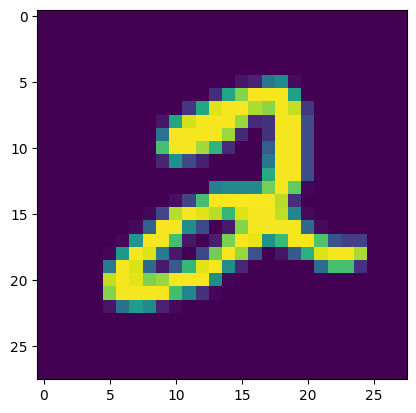

In [21]:
import matplotlib.pyplot as plt

plt.imshow(X_train[5])

In [32]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4531 - loss: 3.8268 - val_accuracy: 0.7139 - val_loss: 0.8587
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7517 - loss: 0.7822 - val_accuracy: 0.8459 - val_loss: 0.5277
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8733 - loss: 0.4659 - val_accuracy: 0.9104 - val_loss: 0.3757
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9244 - loss: 0.2886 - val_accuracy: 0.9451 - val_loss: 0.2638
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9474 - loss: 0.2066 - val_accuracy: 0.9447 - val_loss: 0.2349
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9558 - loss: 0.1662 - val_accuracy: 0.9558 - val_loss: 0.1927
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9644 - loss: 0.1322 - val_accuracy: 0.9619 - val_loss: 0.1716
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9696 - loss: 0.1091 -

In [36]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
y_pred = y_prob.argmax(axis=1)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9695

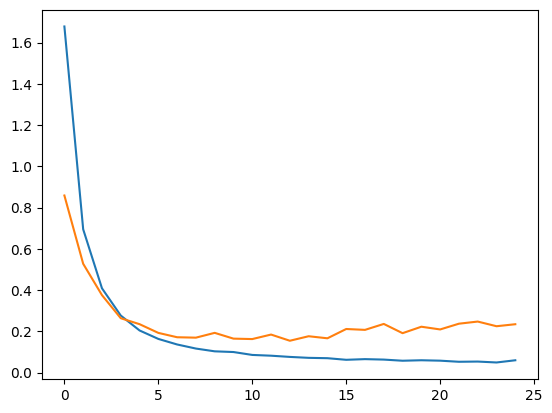

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

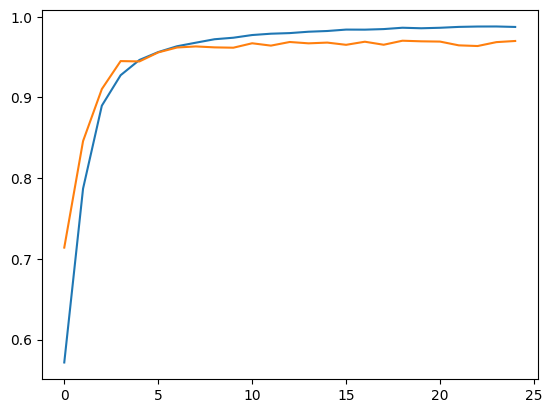

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

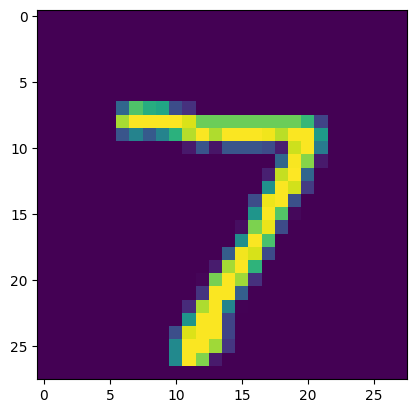

In [45]:
plt.imshow(X_test[0])

In [47]:
X_test[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197,
        251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 190, 251,
        251, 251, 253, 169, 109,  62,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 251, 251,
        251, 251, 253, 251, 251, 220,  51,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 182, 255, 253, 253,
        253, 253, 234, 222, 253, 253, 253,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  63, 221, 253, 251, 251,
        251, 147,  77,  62, 128, 251, 251, 105,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  32, 231, 251, 253, 251, 220,
        137,  10,   0,   0,  31, 230, 251, 243, 113,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253, 188,  20,
          0,   0,   0,   0,   0, 109, 251, 253, 251,  35,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 201,  30,   0,
          0,   0,   0,   0,   0,  31, 200, 253, 251,  35,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 253, 253,   0,   0,   0,
          0,   0,   0,   0,   0,  32, 202, 255, 253, 164,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 140, 251, 251,   0,   0,   0,
          0,   0,   0,   0,   0, 109, 251, 253, 251,  35,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 217, 251, 251,   0,   0,   0,
          0,   0,   0,  21,  63, 231, 251, 253, 230,  30,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 217, 251, 251,   0,   0,   0,
          0,   0,   0, 144, 251, 251, 251, 221,  61,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 217, 251, 251,   0,   0,   0,
          0,   0, 182, 221, 251, 251, 251, 180,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 218, 253, 253,  73,  73, 228,
        253, 253, 255, 253, 253, 253, 253,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 113, 251, 251, 253, 251, 251,
        251, 251, 253, 251, 251, 251, 147,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  31, 230, 251, 253, 251, 251,
        251, 251, 253, 230, 189,  35,  10,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  62, 142, 253, 251, 251,
        251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 174, 251,
        173,  71,  72,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [48]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([7])

In [49]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([0])